In [1]:
%load_ext sql
%sql sqlite:///base.db

# DDL и DML

## Создание таблицы

In [2]:
%%sql
DROP TABLE IF EXISTS Products;
DROP TABLE IF EXISTS Items;

CREATE TABLE Items (
          product_id integer PRIMARY KEY,
          product_name varchar(20) NOT NULL,
          price integer DEFAULT 0
          );

 * sqlite:///base.db
Done.
Done.
Done.


[]

In [3]:
%%sql

INSERT INTO Items VALUES (NULL, 'Ноутбук', 35000);
INSERT INTO Items VALUES (NULL, 'Микрофон', 5000);
INSERT INTO Items VALUES (NULL, 'Смартфон', 42000);
INSERT INTO Items VALUES (NULL, 'Телевизор', 18000);
INSERT INTO Items (product_name) VALUES ('Монитор');
INSERT INTO Items (product_name, price) VALUES ('Смартфон', 42000);
INSERT INTO Items (product_name) VALUES ('Ноутбук');

 * sqlite:///base.db
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.


[]

In [4]:
%%sql
SELECT * FROM Items;

 * sqlite:///base.db
Done.


product_id,product_name,price
1,Ноутбук,35000
2,Микрофон,5000
3,Смартфон,42000
4,Телевизор,18000
5,Монитор,0
6,Смартфон,42000
7,Ноутбук,0


## Внесение изменений в схему данных

In [5]:
%%sql
PRAGMA table_info(Items);

 * sqlite:///base.db
Done.


cid,name,type,notnull,dflt_value,pk
0,product_id,INTEGER,0,None,1
1,product_name,varchar(20),1,None,0
2,price,INTEGER,0,0,0


Для изменения описания объектов существует команда ALTER (или delete -> create, но вы теряете данные)

ALTER TABLE

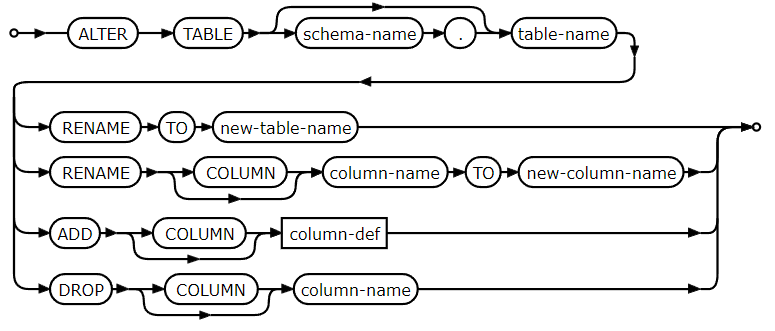

**Переименование таблицы**

In [6]:
%%sql
ALTER TABLE Items RENAME TO Products;

 * sqlite:///base.db
Done.


[]

In [7]:
%%sql
SELECT * FROM Items;

 * sqlite:///base.db
(sqlite3.OperationalError) no such table: Items
[SQL: SELECT * FROM Items;]
(Background on this error at: https://sqlalche.me/e/20/e3q8)


**Добавление столбца**

In [8]:
%%sql
ALTER TABLE Products ADD COLUMN manufacturer varchar(20) DEFAULT "не указан";

 * sqlite:///base.db
Done.


[]

In [9]:
%%sql
PRAGMA table_info(Products);

 * sqlite:///base.db
Done.


cid,name,type,notnull,dflt_value,pk
0,product_id,INTEGER,0,None,1
1,product_name,varchar(20),1,None,0
2,price,INTEGER,0,0,0
3,manufacturer,varchar(20),0,"""не указан""",0


In [10]:
%%sql
SELECT * FROM Products;

 * sqlite:///base.db
Done.


product_id,product_name,price,manufacturer
1,Ноутбук,35000,не указан
2,Микрофон,5000,не указан
3,Смартфон,42000,не указан
4,Телевизор,18000,не указан
5,Монитор,0,не указан
6,Смартфон,42000,не указан
7,Ноутбук,0,не указан


**Переименовать столбец в таблице**

<s>Нельзя использовать оператор ALTER TABLE для переименования столбца в SQLite. Вместо этого нужно переименовать таблицу, создать новую таблицу и скопировать данные в новую таблицу.</s>

Теперь можно :)

In [11]:
%%sql
ALTER TABLE Products RENAME COLUMN product_id TO id;
ALTER TABLE Products RENAME COLUMN product_name TO pname;

 * sqlite:///base.db
Done.
Done.


[]

**Удалить столбец**

In [12]:
%%sql
ALTER TABLE Products DROP COLUMN manufacturer;

 * sqlite:///base.db
Done.


[]

In [13]:
%%sql
ALTER TABLE Products DROP COLUMN id;

-- поменять первичный ключ (как и любые свойства таблицы - в SQlite напрямую нельзя)

 * sqlite:///base.db
(sqlite3.OperationalError) cannot drop PRIMARY KEY column: "id"
[SQL: ALTER TABLE Products DROP COLUMN id;]
(Background on this error at: https://sqlalche.me/e/20/e3q8)


In [14]:
%%sql
SELECT * FROM Products;

 * sqlite:///base.db
Done.


id,pname,price
1,Ноутбук,35000
2,Микрофон,5000
3,Смартфон,42000
4,Телевизор,18000
5,Монитор,0
6,Смартфон,42000
7,Ноутбук,0


**Поменять свойства или тип данных столбца**

In [15]:
%%sql
SELECT * FROM sqlite_master;

 * sqlite:///base.db
Done.


type,name,tbl_name,rootpage,sql
table,Products,Products,2,"CREATE TABLE ""Products"" ( id integer PRIMARY KEY, pname varchar(20) NOT NULL, price integer DEFAULT 0 )"


In [16]:
%%sql
SELECT MIN(price) FROM Products;

 * sqlite:///base.db
Done.


MIN(price)
0


Нельзя использовать оператор ALTER TABLE для изменения свойств столбца в SQLite. Вместо этого нужно переименовать таблицу, создать новую таблицу и скопировать данные в новую таблицу.

In [17]:
%%sql

PRAGMA foreign_keys=off; -- Первый этап - отключение внешних ключей

CREATE TABLE _Products_new (
  id integer PRIMARY KEY,
  pname varchar(20) NOT NULL,
  price decimal(10,2) --NOT NULL
  );

INSERT INTO _Products_new
  SELECT *
  FROM Products;

DROP TABLE Products;

ALTER TABLE _Products_new RENAME TO Products;

PRAGMA foreign_keys=on;

 * sqlite:///base.db
Done.
Done.
7 rows affected.
Done.
Done.
Done.


[]

In [18]:
%%sql
INSERT INTO Products (pname) VALUES ('Монитор');
SELECT * FROM Products;

 * sqlite:///base.db
1 rows affected.
Done.


id,pname,price
1,Ноутбук,35000
2,Микрофон,5000
3,Смартфон,42000
4,Телевизор,18000
5,Монитор,0
6,Смартфон,42000
7,Ноутбук,0
8,Монитор,None


## Изменение данных в таблице (DML)

UPDATE & DELETE

In [19]:
%%sql
UPDATE Products SET price = 37999, pname = 'Телевизор' WHERE id = 5;

 * sqlite:///base.db
1 rows affected.


[]

In [20]:
%%sql
UPDATE Products SET (price, pname) = (40000, 'Ноутбук') WHERE id = 8;
-- не рекомендуется

 * sqlite:///base.db
1 rows affected.
Done.


[]

In [22]:
%%sql
UPDATE Products SET price = price + 24000 WHERE pname = 'Ноутбук';

 * sqlite:///base.db
3 rows affected.


[]

In [23]:
%%sql
SELECT * FROM Products;

 * sqlite:///base.db
Done.


id,pname,price
1,Ноутбук,59000
2,Микрофон,5000
3,Смартфон,42000
4,Телевизор,18000
5,Телевизор,37999
6,Смартфон,42000
7,Ноутбук,24000
8,Ноутбук,64000


In [24]:
%%sql
DELETE FROM Products WHERE price < 1000;

 * sqlite:///base.db
0 rows affected.


[]

In [25]:
%%sql
SELECT MIN(price) FROM Products;

 * sqlite:///base.db
Done.


MIN(price)
5000


Не забывайте про WHERE (иначе будет больно)

In [26]:
%%sql
UPDATE Products SET price = 37999;

 * sqlite:///base.db
8 rows affected.


[]

In [27]:
%%sql
SELECT * FROM Products;

 * sqlite:///base.db
Done.


id,pname,price
1,Ноутбук,37999
2,Микрофон,37999
3,Смартфон,37999
4,Телевизор,37999
5,Телевизор,37999
6,Смартфон,37999
7,Ноутбук,37999
8,Ноутбук,37999


In [28]:
%%sql
DELETE FROM Products;

 * sqlite:///base.db
8 rows affected.


[]

## Удаление таблицы и внешние ключи

DROP TABLE

Необратимая процедура - применять очень осторожно!

Ограничения внешних ключей делятся на 2 операции:

ON DELETE и ON UPDATE:

* RESTRICT - запрет удаления/изменения
* CASCADE - автоматически удаляет/изменяет строки из дочерней таблицы при удалении или изменении связанных строк во внешней таблице
* SET NULL - устанавливает значение NULL в связанных строках при удалении/изменении
* SET DEFAULT - значение по умолчанию (только на update)
* NO ACTION - то же, что и RESTRICT

In [29]:
%%sql

PRAGMA foreign_keys=on;

DROP TABLE IF EXISTS Invoices;
DROP TABLE IF EXISTS Products;
DROP TABLE IF EXISTS Brands;

CREATE TABLE Brands (
          id integer PRIMARY KEY,
          bname varchar(20) NOT NULL,
          country varchar(20) NOT NULL
          );

CREATE TABLE Products (
          id integer PRIMARY KEY,
          pname varchar(20) NOT NULL,
          brand_id integer NOT NULL,
          price decimal(10,2) NOT NULL,
          FOREIGN KEY (brand_id) REFERENCES Brands
          ON DELETE NO ACTION ON UPDATE NO ACTION
          );

CREATE TABLE Invoices (
          id integer PRIMARY KEY,
          prod_id integer NOT NULL,
          date datetime NOT NULL,
          FOREIGN KEY (prod_id) REFERENCES Products(id)
          ON DELETE RESTRICT ON UPDATE RESTRICT
          );

 * sqlite:///base.db
Done.
Done.
Done.
Done.
Done.
Done.
Done.


[]

In [41]:
%%sql

INSERT INTO Brands VALUES (1, 'LG', 'Южная Корея');
INSERT INTO Brands VALUES (2, 'Xiaomi', 'Китай');
INSERT INTO Brands VALUES (3, 'Fifine', 'Китай');
INSERT INTO Brands VALUES (4, 'Apple', 'США');

INSERT INTO Products VALUES (1, 'Ноутбук', 1, 45000);
INSERT INTO Products VALUES (2, 'Микрофон', 3, 5200);
INSERT INTO Products VALUES (3, 'Смартфон', 2, 22000);
INSERT INTO Products VALUES (4, 'Телевизор', 1, 28999);
INSERT INTO Products VALUES (5, 'Телевизор', 2, 21000);
INSERT INTO Products VALUES (6, 'Смартфон', 4, 74999);
INSERT INTO Products VALUES (7, 'Ноутбук', 4, 135000);

INSERT INTO Invoices VALUES (NULL, 1, date('now', '-8 day'));
INSERT INTO Invoices VALUES (NULL, 3, date('now', '-6 day'));
INSERT INTO Invoices VALUES (NULL, 4, date('now', '-4 day'));
INSERT INTO Invoices VALUES (NULL, 1, date('now', '-3 day'));
INSERT INTO Invoices VALUES (NULL, 2, date('now', '-2 day'));
INSERT INTO Invoices VALUES (NULL, 7, date('now'));

 * sqlite:///base.db
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.


[]

In [31]:
%%sql
SELECT Invoices.id, pname, price, bname, country, date FROM Invoices
    JOIN Products ON Invoices.prod_id = Products.id
    JOIN Brands ON Products.brand_id = Brands.id;

 * sqlite:///base.db
Done.


id,pname,price,bname,country,date
1,Ноутбук,45000,LG,Южная Корея,2024-10-21
2,Смартфон,22000,Xiaomi,Китай,2024-10-23
3,Телевизор,28999,LG,Южная Корея,2024-10-25
4,Ноутбук,45000,LG,Южная Корея,2024-10-26
5,Микрофон,5200,Fifine,Китай,2024-10-27
6,Ноутбук,135000,Apple,США,2024-10-29


In [32]:
%%sql
ALTER TABLE Invoices DROP FOREIGN KEY prod_id;

 * sqlite:///base.db
(sqlite3.OperationalError) near "FOREIGN": syntax error
[SQL: ALTER TABLE Invoices DROP FOREIGN KEY prod_id;]
(Background on this error at: https://sqlalche.me/e/20/e3q8)


In [33]:
%%sql
DROP TABLE Brands;

 * sqlite:///base.db
(sqlite3.IntegrityError) FOREIGN KEY constraint failed
[SQL: DROP TABLE Brands;]
(Background on this error at: https://sqlalche.me/e/20/gkpj)


In [34]:
%%sql
DELETE FROM Products WHERE price > 100000;

 * sqlite:///base.db
(sqlite3.IntegrityError) FOREIGN KEY constraint failed
[SQL: DELETE FROM Products WHERE price > 100000;]
(Background on this error at: https://sqlalche.me/e/20/gkpj)


In [36]:
%%sql
UPDATE Brands SET id = 9 where id = 1;

 * sqlite:///base.db
(sqlite3.IntegrityError) FOREIGN KEY constraint failed
[SQL: UPDATE Brands SET id = 9 where id = 1;]
(Background on this error at: https://sqlalche.me/e/20/gkpj)


In [37]:
%%sql
DELETE FROM Products WHERE id = 5; -- этого товара не было в заказах

 * sqlite:///base.db
1 rows affected.


[]

In [40]:
%%sql

PRAGMA foreign_keys=on;

DROP TABLE IF EXISTS Invoices;
DROP TABLE IF EXISTS Products;
DROP TABLE IF EXISTS Brands;

CREATE TABLE Brands (
          id integer PRIMARY KEY,
          bname varchar(20) NOT NULL,
          country varchar(20) NOT NULL
          );

CREATE TABLE Products (
          id integer PRIMARY KEY,
          pname varchar(20) NOT NULL,
          brand_id integer,                       --нельзя not null
          price decimal(10,2) NOT NULL,
          FOREIGN KEY (brand_id) REFERENCES Brands
          ON DELETE SET NULL ON UPDATE SET NULL   --меняем свойства
          );

CREATE TABLE Invoices (
          id integer PRIMARY KEY,
          prod_id integer NOT NULL,
          date datetime NOT NULL,
          FOREIGN KEY (prod_id) REFERENCES Products(id)
          ON DELETE CASCADE ON UPDATE CASCADE   --меняем свойства
          );

 * sqlite:///base.db
Done.
Done.
Done.
Done.
Done.
Done.
Done.


[]

In [42]:
%%sql
SELECT * FROM Brands;

 * sqlite:///base.db
Done.


id,bname,country
1,LG,Южная Корея
2,Xiaomi,Китай
3,Fifine,Китай
4,Apple,США


In [43]:
%%sql
DELETE FROM Brands WHERE id = 3;

 * sqlite:///base.db
1 rows affected.


[]

In [44]:
%%sql
UPDATE Brands SET id = 6 where id = 1;

 * sqlite:///base.db
1 rows affected.


[]

In [45]:
%%sql
SELECT * FROM Products;

 * sqlite:///base.db
Done.


id,pname,brand_id,price
1,Ноутбук,None,45000
2,Микрофон,None,5200
3,Смартфон,2,22000
4,Телевизор,None,28999
5,Телевизор,2,21000
6,Смартфон,4,74999
7,Ноутбук,4,135000


In [46]:
%%sql
DELETE FROM Products WHERE id = 1;

 * sqlite:///base.db
1 rows affected.


[]

In [49]:
%%sql
SELECT * FROM Invoices;

 * sqlite:///base.db
Done.


id,prod_id,date
2,10,2024-10-23
3,4,2024-10-25
5,2,2024-10-27
6,7,2024-10-29


In [48]:
%%sql
UPDATE Products SET id = 10 where id = 3;

 * sqlite:///base.db
1 rows affected.


[]